<a href="https://colab.research.google.com/github/Cecax27/DS-Stardew-Valley-Crops-Profit/blob/main/notebooks/Stardew_valley_transform_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transform data

Previously, I extracted information from Stardew Valley Wiki about the crops and theirs seeds. You can see the notebook on: [Stardew_valley_web_scraper.ipynb](https://github.com/Cecax27/DS-Stardew-Valley-Crops-Profit/blob/main/notebooks/Stardew_valley_web_scraper.ipynb)

In this notebook I'll transform and clean the data to start to making analysis.

The url of the website is https://stardewvalleywiki.com. You can visit it to find a lot of information about the game.

## Importing libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [30]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (7, 5)

## Loading data from csv

In [31]:
df = pd.read_csv('../data/crops_raw_data.csv')

print(f'DataFrame created with {df.shape[0]} rows and {df.shape[1]} columns\n')
print('Columns:')
print(df.dtypes)

DataFrame created with 43 rows and 27 columns

Columns:
Unnamed: 0                    int64
growth_time                  object
source                       object
sell_prices_silver          float64
seed                         object
sell_prices_gold            float64
description                  object
general_store_price         float64
night_market_price          float64
sell_price_regular          float64
egg_festival_price          float64
sell_price_silver           float64
traveling_cart_price_min    float64
sell_prices_iridium         float64
sell_price_iridium          float64
artisan_sell_price           object
sell_price_gold             float64
sell_prices_regular         float64
traveling_cart_price_max    float64
regrowth_time               float64
base                         object
oasis_price                 float64
xp                           object
energy                       object
season                       object
jojamart_price              float64
name    

## Transform data

Seeing the columns, I can start thinking about first modifications.

* I want to have the name column as the first. And the other ones ordered by alphabet.
* I have one column "sell_price_regular" and another "sell_prices_regular". The same for all the qualities. I will join both columns.
* I have in the column "season" a string with the seasons of each crop. I will divide the column in each season, like "spring", etc. And fill them with booleans values.

In [32]:
# Ordering columns by alphabet
df = df.sort_index(axis=1)

# Changing 'name' column first
name_column = df.pop('name')
df.insert(0, 'name', name_column)

# Sorting the rows oby alphabet
df = df.sort_values('name')

In [33]:
# Joining the sell_price columns
df['sell_price_regular'] = df['sell_price_regular'].combine_first(df['sell_prices_regular'])
df = df.drop('sell_prices_regular', axis=1)

df['sell_price_silver'] = df['sell_price_silver'].combine_first(df['sell_prices_silver'])
df = df.drop('sell_prices_silver', axis=1)

df['sell_price_gold'] = df['sell_price_gold'].combine_first(df['sell_prices_gold'])
df = df.drop('sell_prices_gold', axis=1)

df['sell_price_iridium'] = df['sell_price_iridium'].combine_first(df['sell_prices_iridium'])
df = df.drop('sell_prices_iridium', axis=1)

In [34]:
# Creating separate columns for each season
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
for season in seasons:
    df[season.lower()] = df['season'].str.contains(season, case=False)

# Fill the values with True or False
df = df.replace({True: 'True', False: 'False'})
df = df.drop('season', axis=1)

In [35]:
# Converting growth time to int
df['growth_time'] = (
    df
    .growth_time
    .fillna('0')
    .apply(lambda i: i.split(' ')[0])
    .astype(int)
)

In [36]:
# Converting regrowth time to int
df['regrowth_time'] = (
    df
    .regrowth_time
    .fillna('0')
    .astype(int)
)

In [37]:
print(f'DataFrame have {df.shape[0]} rows and {df.shape[1]} columns\n')
print('Columns:')
print(df.dtypes)

DataFrame have 43 rows and 26 columns

Columns:
name                         object
Unnamed: 0                    int64
artisan_sell_price           object
base                         object
description                  object
egg_festival_price          float64
energy                       object
general_store_price         float64
growth_time                   int32
jojamart_price              float64
night_market_price          float64
oasis_price                 float64
regrowth_time                 int32
seed                         object
sell_price_gold             float64
sell_price_iridium          float64
sell_price_regular          float64
sell_price_silver           float64
source                       object
traveling_cart_price_max    float64
traveling_cart_price_min    float64
xp                           object
spring                       object
summer                       object
fall                         object
winter                       object
dtype: object


## Cleaning data

In [38]:
# Deleting unnamed column (indexes)
df.pop('Unnamed: 0')

25    25
35    35
26    26
27    27
0      0
12    12
28    28
36    36
1      1
2      2
13    13
29    29
30    30
31    31
37    37
3      3
32    32
4      4
14    14
15    15
5      5
16    16
38    38
6      6
39    39
17    17
7      7
33    33
18    18
19    19
8      8
20    20
9      9
21    21
22    22
41    41
40    40
42    42
23    23
10    10
11    11
24    24
34    34
Name: Unnamed: 0, dtype: int64

In [39]:
# Wich columns have null values?
(
    df
    .isnull()
    .sum()
)

name                         0
artisan_sell_price          42
base                         4
description                  0
egg_festival_price          42
energy                      36
general_store_price         14
growth_time                  0
jojamart_price              19
night_market_price          35
oasis_price                 40
regrowth_time                0
seed                         2
sell_price_gold              2
sell_price_iridium           2
sell_price_regular           1
sell_price_silver            2
source                      39
traveling_cart_price_max     7
traveling_cart_price_min     7
xp                           2
spring                       2
summer                       2
fall                         2
winter                       2
dtype: int64

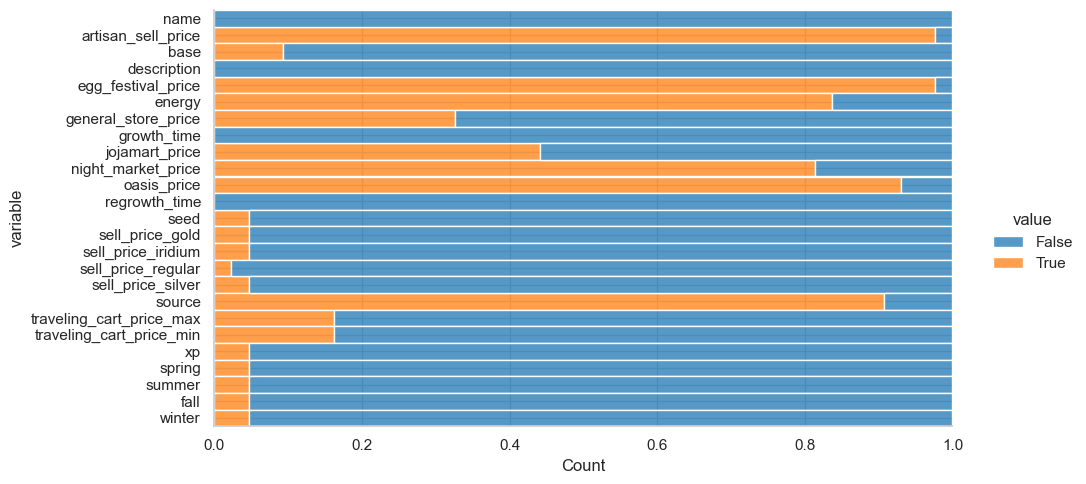

In [40]:
# Null values proportion for each variable
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

In [41]:
df.describe(include = 'all')

,name,artisan_sell_price,base,description,egg_festival_price,energy,general_store_price,growth_time,jojamart_price,night_market_price,...,sell_price_regular,sell_price_silver,source,traveling_cart_price_max,traveling_cart_price_min,xp,spring,summer,fall,winter
count,43,1,39,43,1.0,7,29.000000,43.000000,24.000000,8.000000,...,42.000000,41.000000,4,36.000000,36.000000,41,41,41,41,41
unique,43,1,1,43,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,31,2,2,2,1
top,Amaranth,150g,Artisan (+40%),A purple grain cultivated by an ancient civili...,NaN,Inedible,NaN,NaN,NaN,NaN,...,NaN,NaN,Foraging in the Desert\nOasis\n Cactus Seeds,NaN,NaN,14 Farming XP,False,False,False,False
freq,1,1,39,1,NaN,7,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,3,27,22,25,41
mean,NaN,NaN,NaN,NaN,100.0,NaN,73.793103,9.348837,90.958333,46.250000,...,200.619048,255.097561,NaN,1041.666667,187.222222,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,57.159788,5.406714,69.644738,22.638463,...,465.428203,588.279262,NaN,250.000000,254.312643,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,100.0,NaN,10.000000,0.000000,12.000000,20.000000,...,1.000000,1.000000,NaN,1000.000000,100.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,100.0,NaN,40.000000,6.000000,50.000000,27.500000,...,50.000000,62.000000,NaN,1000.000000,100.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,100.0,NaN,60.000000,8.000000,75.000000,45.000000,...,80.000000,100.000000,NaN,1000.000000,100.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,100.0,NaN,80.000000,12.000000,106.250000,62.500000,...,160.000000,200.000000,NaN,1000.000000,150.000000,NaN,NaN,NaN,NaN,NaN


## Saving the data

In [42]:
df.to_csv('../data/crops_preprocessed_data.csv', index=False)